In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df = df.set_index('date')

In [5]:
lower = df['value'].quantile(0.025)
upper = df['value'].quantile(0.975)


In [6]:
df_clean = df[(df['value'] >= lower) & (df['value'] <= upper)]

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

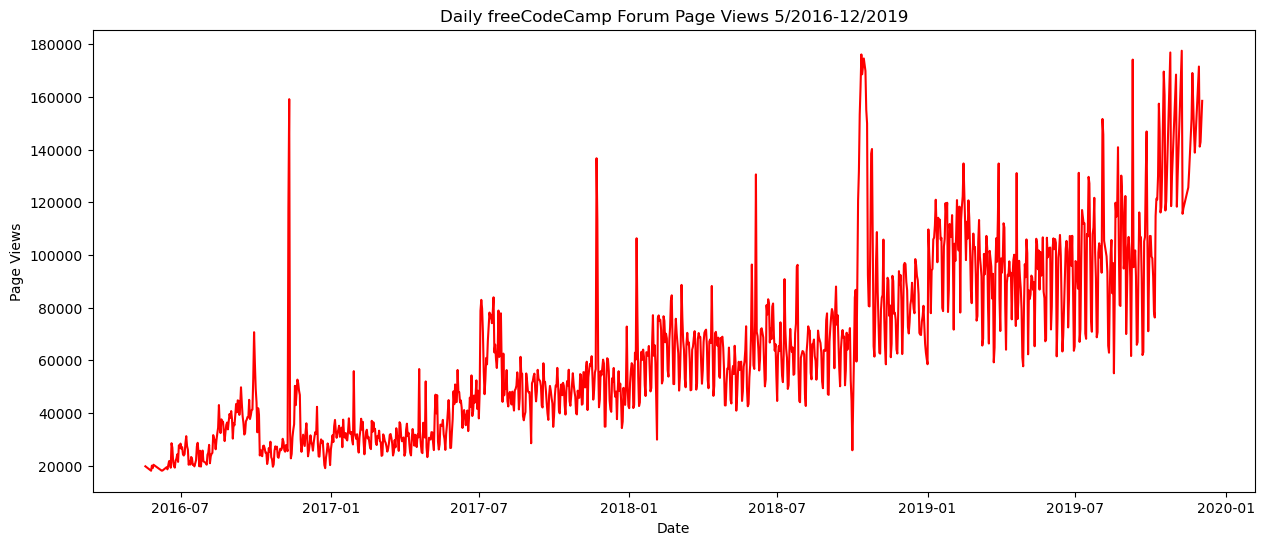

In [7]:
plt.subplots(figsize=(15,6))
plt.plot(df_clean.index,df_clean['value'],'r')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.savefig('line_plot.png')

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

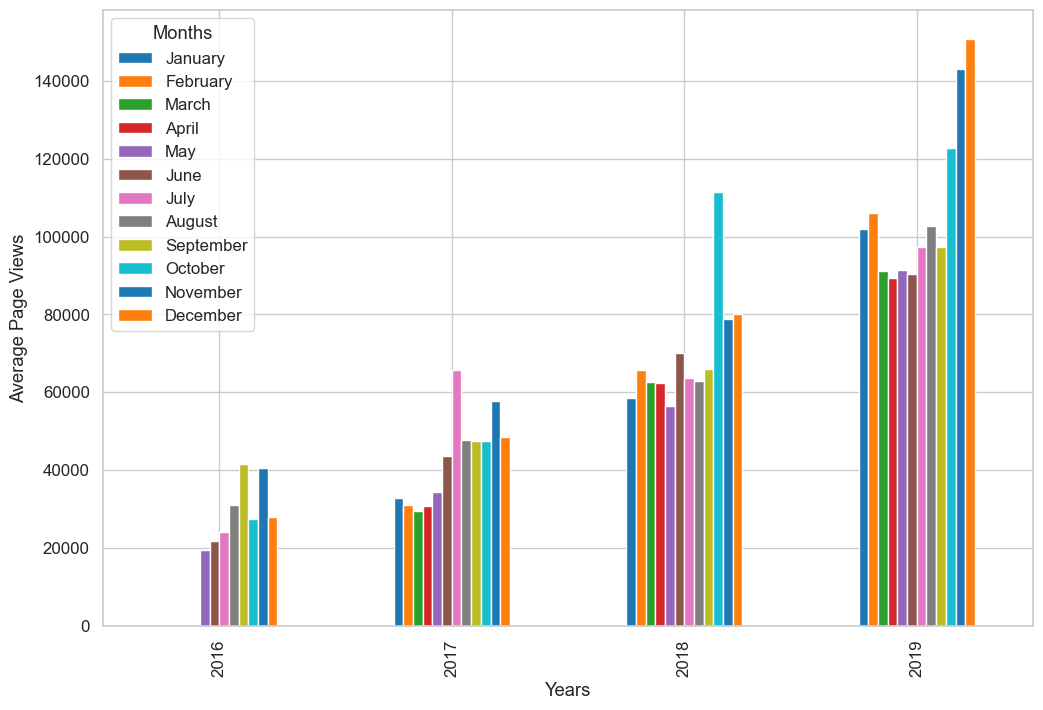

In [98]:
df_bar = df_clean.copy()
df_bar['Month'] = df_bar.index.month_name()
df_bar['Year'] = df_bar.index.year

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df_bar['Month'] = pd.Categorical(df_bar['Month'], categories=month_order, ordered=True)
df_bar = df_bar.groupby(['Year','Month'])['value'].mean().unstack()

fig = df_bar.plot(kind='bar', figsize=(12, 8)).figure
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title="Months")
fig.savefig('bar_plot.png')

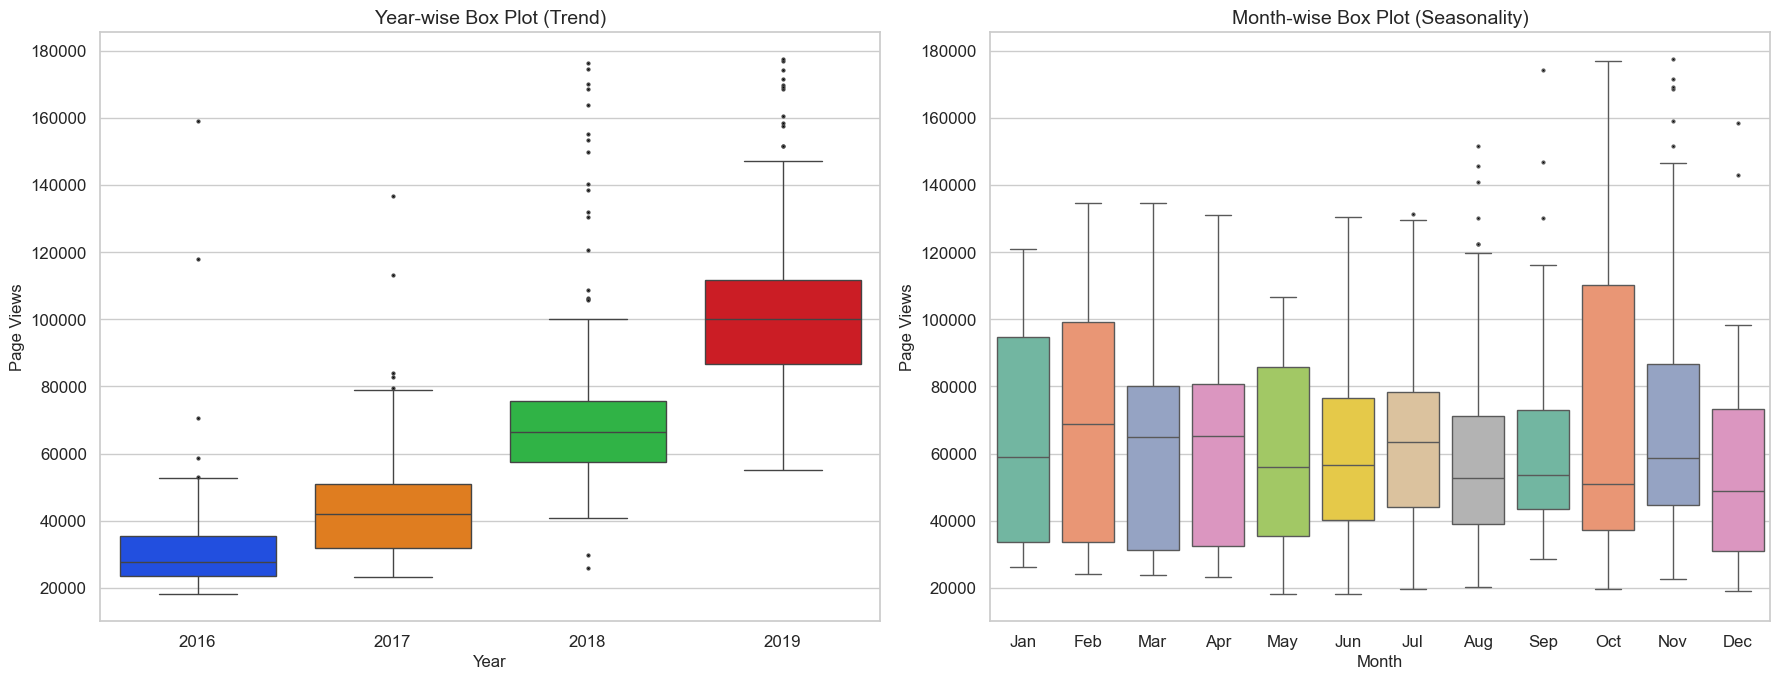

In [99]:
def boxplot():
    
    month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    fig, axes = plt.subplots(1, 2, figsize=(18,7))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.1)
    
    df_box = df_clean.copy()
    df_box['Month'] = df_box.index.month_name().str[:3]
    df_box['Year'] = df_box.index.year
    df_box['Month'] = pd.Categorical(df_box['Month'], categories=month_order, ordered=True)
    
    
    sns.boxplot(ax=axes[0] ,data=df_box,x='Year',y='value',palette='bright',flierprops=dict(marker='o', markersize=2, markerfacecolor='black'))
    axes[0].set_title("Year-wise Box Plot (Trend)", fontsize=14)
    axes[0].set_xlabel("Year", fontsize=12)
    axes[0].set_ylabel("Page Views", fontsize=12)
    
    sns.boxplot(ax=axes[1],data=df_box,x='Month',y='value',palette='Set2',flierprops=dict(marker='o', markersize=2, markerfacecolor='black'))
    axes[1].set_title("Month-wise Box Plot (Seasonality)", fontsize=14)
    axes[1].set_xlabel("Month", fontsize=12)
    axes[1].set_ylabel("Page Views", fontsize=12)
    
    plt.tight_layout()
    plt.close()
    return fig

boxplot()